Лабораторная №4

In [ ]:
"""1,2"""
import pandas as pd
import numpy as np
data = pd.read_csv('2016-FCC-New-Coders-Survey-Data.csv', usecols=['EmploymentField',
'EmploymentStatus', 'Gender', 'JobPref', 'JobWherePref', 'MaritalStatus', 'Income'], dtype={'EmploymentField':str,
'EmploymentStatus':str, 'Gender':str, 'JobPref':str, 'JobWherePref':str, 'MaritalStatus':str, 'Income':float})
data


In [ ]:
"""3"""
data = data.dropna(subset=['Gender'], how='any')
data = data[(data['Gender'] == 'male') | (data['Gender'] == 'female')]
data

In [ ]:
"""4"""
from scipy.stats.contingency import expected_freq
import scipy.stats

In [ ]:
# 1)
#таблица сопряженности
res = pd.crosstab(data["Gender"], data["JobPref"], margins = False)
res

JobWherePref,from home,in an office with other developers,no preference
Gender,,,
female,329,826,320
male,736,2479,1161


In [ ]:
#таблица ожидаемых значений
res = pd.crosstab(data["Gender"], data["JobPref"], margins = False)
expected = scipy.stats.contingency.expected_freq(res)
expected

array([[ 475.43252595,  460.28394057,  669.80052921,  275.70425402,
         408.77875025],
       [1564.56747405, 1514.71605943, 2204.19947079,  907.29574598,
        1345.22124975]])

In [ ]:
#критерий Пирсона
scipy.stats.chi2_contingency(res)

(158.5814228127144,
 2.9454175892568116e-33,
 4,
 array([[ 475.43252595,  460.28394057,  669.80052921,  275.70425402,
          408.77875025],
        [1564.56747405, 1514.71605943, 2204.19947079,  907.29574598,
         1345.22124975]]))

p-value=2,94, число степеней свободы=1, принимаем H0, так как p-value<0,05 -> связи между полом и предпочтениями в работе нет.

In [ ]:
# 2)
#таблица сопряженности
res = pd.crosstab(data["Gender"], data["JobWherePref"], margins = False)
res

JobWherePref,from home,in an office with other developers,no preference
Gender,,,
female,329,826,320
male,736,2479,1161


In [ ]:
#таблица ожидаемых значений
res = pd.crosstab(data["Gender"], data["JobWherePref"], margins = False)
expected = scipy.stats.contingency.expected_freq(res)
expected

array([[ 268.47974705,  833.16954367,  373.35070928],
       [ 796.52025295, 2471.83045633, 1107.64929072]])

In [ ]:
#критерий Пирсона
scipy.stats.chi2_contingency(res)

(28.51657428485632,
 6.422506798401339e-07,
 2,
 array([[ 268.47974705,  833.16954367,  373.35070928],
        [ 796.52025295, 2471.83045633, 1107.64929072]]))

p-value=6,4, число степеней свободы=2, принимаем H0, так как p-value<0,05 -> связи между полом и предпочтениями места работы нет.

In [ ]:
# 3)
#таблица сопряженности
res = pd.crosstab(data["JobWherePref"], data["MaritalStatus"], margins = False)
res

MaritalStatus,divorced,married or domestic partnership,separated,"single, never married",widowed
JobWherePref,,,,,
from home,23,267,4,47,1
in an office with other developers,25,527,5,143,1
no preference,22,269,8,75,2


In [ ]:
#таблица ожидаемых значений
res = pd.crosstab(data["JobWherePref"], data["MaritalStatus"], margins = False)
expected = scipy.stats.contingency.expected_freq(res)
expected

array([[ 16.87103594, 256.1987315 ,   4.09725159,  63.86892178,
          0.9640592 ],
       [ 34.58069063, 525.13248767,   8.39816772, 130.91261452,
          1.97603946],
       [ 18.54827343, 281.66878083,   4.50458069,  70.21846371,
          1.05990134]])

In [ ]:
!apt-get install r-base
!pip install rpy2

In [ ]:
#тест Фримана-Холтона (ождиемые значения менее 5 в более чем 20% ячеек)
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()
stats=importr("stats")
m=np.array(res.values)
r=stats.fisher_test(m)

In [ ]:
# 4)
#таблица сопряженности
res = pd.crosstab(data["EmploymentField"], data["JobWherePref"], margins = False)
res

JobWherePref,from home,in an office with other developers,no preference
EmploymentField,,,
architecture or physical engineering,15,49,15
"arts, entertainment, sports, or media",41,100,43
construction and extraction,8,31,17
education,80,175,54
"farming, fishing, and forestry",2,7,2
finance,21,77,25
food and beverage,27,91,48
health care,23,64,34
law enforcement and fire and rescue,1,7,5


In [ ]:
#таблица ожидаемых значений
res = pd.crosstab(data["EmploymentField"], data["JobWherePref"], margins = False)
expected = scipy.stats.contingency.expected_freq(res)
expected

array([[ 15.78719092,  44.2553709 ,  18.95743818],
       [ 36.77016619, 103.07580057,  44.15403324],
       [ 11.19092015,  31.37089582,  13.43818403],
       [ 61.74989866, 173.10012161,  74.14997973],
       [  2.19821646,   6.16214025,   2.63964329],
       [ 24.58005675,  68.9039319 ,  29.51601135],
       [ 33.17308472,  92.99229834,  39.83461694],
       [ 24.18038103,  67.78354276,  29.03607621],
       [  2.59789218,   7.28252939,   3.11957844],
       [  6.19497365,  17.36603162,   7.43899473],
       [ 47.36157276, 132.76611269,  56.87231455],
       [ 36.57032833, 102.515606  ,  43.91406567],
       [  3.59708148,  10.08350223,   4.3194163 ],
       [172.65991082, 484.00810701, 207.33198216],
       [ 14.3883259 ,  40.33400892,  17.27766518]])

In [ ]:
#критерий Пирсона
scipy.stats.chi2_contingency(res)

(17.859055517955113,
 0.022308349488174187,
 8,
 array([[ 16.87103594, 256.1987315 ,   4.09725159,  63.86892178,
           0.9640592 ],
        [ 34.58069063, 525.13248767,   8.39816772, 130.91261452,
           1.97603946],
        [ 18.54827343, 281.66878083,   4.50458069,  70.21846371,
           1.05990134]]))

p-value=0,02, число степеней свободы=8, отвергаем H0, так как p-value<0,05 -> связь между сферой деятельности и предпочтениями места работы есть.

In [ ]:
ybvf

In [ ]:
# 5)
#таблица сопряженности
res = pd.crosstab(data["EmploymentStatus"], data["JobWherePref"], margins = False)
res

JobWherePref,from home,in an office with other developers,no preference
EmploymentStatus,,,
A stay-at-home parent or homemaker,38,50,20
Doing an unpaid internship,19,74,30
Employed for wages,541,1504,680
Military,3,13,5
Not working and not looking for work,48,268,107
Not working but looking for work,269,897,424
Retired,6,4,6
Self-employed business owner,23,48,23
Self-employed freelancer,67,172,59


In [ ]:
#таблица ожидаемых значений
res = pd.crosstab(data["EmploymentStatus"], data["JobWherePref"], margins = False)
expected = scipy.stats.contingency.expected_freq(res)
expected

array([[  20.30163934,   60.59016393,   27.10819672],
       [  23.12131148,   69.00546448,   30.87322404],
       [ 512.24043716, 1528.77959927,  683.97996357],
       [   3.94754098,   11.78142077,    5.27103825],
       [  79.5147541 ,  237.31147541,  106.17377049],
       [ 298.8852459 ,  892.02185792,  399.09289617],
       [   3.00765027,    8.97632058,    4.01602914],
       [  17.66994536,   52.73588342,   23.59417122],
       [  56.01748634,  167.18397086,   74.79854281],
       [  17.29398907,   51.61384335,   23.09216758]])

In [ ]:
#критерий Пирсона
scipy.stats.chi2_contingency(res)

(58.215251009372096,
 3.962010127372578e-06,
 18,
 array([[  20.30163934,   60.59016393,   27.10819672],
        [  23.12131148,   69.00546448,   30.87322404],
        [ 512.24043716, 1528.77959927,  683.97996357],
        [   3.94754098,   11.78142077,    5.27103825],
        [  79.5147541 ,  237.31147541,  106.17377049],
        [ 298.8852459 ,  892.02185792,  399.09289617],
        [   3.00765027,    8.97632058,    4.01602914],
        [  17.66994536,   52.73588342,   23.59417122],
        [  56.01748634,  167.18397086,   74.79854281],
        [  17.29398907,   51.61384335,   23.09216758]]))

p-value=3,9, число степеней свободы=18, принимаем H0, так как p-value<0,05 -> связи между должностью и предпочтениями места работы нет.

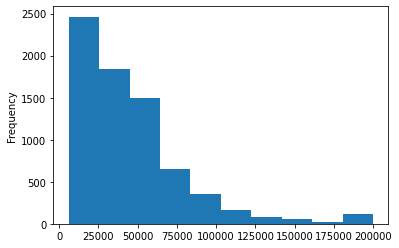

In [ ]:
"""6"""
data['Income'].plot.hist()

Основываясь на приведённом выше графике разделим доход на 3 категории: низкий(0 - 30 000), средний(30 000 - 100 000), высокий(100 000 - 200 000)

In [ ]:
income = list()
for salary in data.Income:
  if salary < 30000:
    income.append("низкий")
  elif salary >= 30000 and salary <= 100000:
    income.append("средний")
  elif salary > 100000:
    income.append("высокий")
df = pd.DataFrame(income, columns = ['Income_Cat'])
data["Income"] = df
data

,EmploymentField,EmploymentStatus,Gender,Income,JobPref,JobWherePref,MaritalStatus
0,office and administrative support,Employed for wages,male,средний,freelance,NaN,married or domestic partnership
1,food and beverage,Employed for wages,male,низкий,work for a startup,in an office with other developers,NaN
2,finance,Employed for wages,male,средний,start your own business,NaN,NaN
3,"arts, entertainment, sports, or media",Employed for wages,female,средний,work for a startup,from home,NaN
4,education,Employed for wages,female,низкий,work for a medium-sized company,in an office with other developers,NaN
...,...,...,...,...,...,...,...
15615,software development and IT,Self-employed freelancer,male,NaN,start your own business,NaN,"single, never married"
15616,software development and IT,Employed for wages,male,NaN,work for a startup,in an office with other developers,"single, never married"
15617,NaN,Self-employed freelancer,male,NaN,freelance,NaN,NaN
15618,education,Self-employed freelancer,male,NaN,NaN,NaN,NaN


In [ ]:
"""7"""
res = pd.crosstab(data["Income"], data["Gender"], margins = False)
res

Gender,female,male
Income,,
высокий,82,350
низкий,606,2009
средний,880,3144


In [ ]:
res = pd.crosstab(data["Income"], data["Gender"], margins = False)
expected = scipy.stats.contingency.expected_freq(res)
expected


array([[  95.79635129,  336.20364871],
       [ 579.87837647, 2035.12162353],
       [ 892.32527224, 3131.67472776]])

In [ ]:
res = pd.crosstab(data["Income"], data["Gender"], margins = False)
scipy.stats.chi2_contingency(res)

(4.283785989027224,
 0.11743233372032803,
 2,
 array([[  95.79635129,  336.20364871],
        [ 579.87837647, 2035.12162353],
        [ 892.32527224, 3131.67472776]]))

p-value принимает значение 0.11743233372032803 Число степеней свободы 1 Для 5 уровня
значимости p value велико. Это означает, что нулевая гипотеза (о том, что выборки
одного параметра при разных значениях другого статистически неотличимы) верна
Значит нельзя говорить о связи между данными переменными